**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Load the data and cleanup
train_data = pd.read_csv("train_data.csv", header=None)
test_data = pd.read_csv("test_data.csv", header=None)
train_labels = pd.read_csv("train_labels.csv", header=None)




In [3]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 1 columns):
0    4363 non-null int64
dtypes: int64(1)
memory usage: 34.2 KB


In [ ]:
#Analysis of the input data: MATTE
print(train_data.shape, test_data.shape, train_labels.shape)



#Histogram of class distribution

class_labels = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']

plt.hist(train_labels, bins=10)
plt.show()

plt.scatter(train_data.values[:,45], train_labels)
plt.show()

(4363, 264) (6544, 264) (4363, 1)


In [102]:
#Analysis of the input data: MATTI
from sklearn.decomposition import PCA

#TODO: divide data training data and labels into two halves - one for training, the other for validation
#TODO: Counteract imbalance in data set

def create_reduced_data(data):
    assert data.shape[1] == 264
    N=data.shape[0]
    reduced_data=np.zeros((N,96))
    for i in range(0,N):
        #1: Collect mean and variance of all 24 rhythm bands. Each band consists of 7 statistics
        for j in range(0,24):
            mean=data[i,j*7]
            variance=data[i,j*7+2]
            reduced_data[i,2*j]=mean
            reduced_data[i,2*j+1]=variance
        #2: Collect mean and standard deviation of all 12 chroma bands. Each band consists of 4 statistics
        for j in range(0,12):
            mean=data[i,168+j*4]
            std_dev=data[i,168+j*4+1]
            reduced_data[i,48+2*j]=mean
            reduced_data[i,48+2*j+1]=std_dev
        #3: Collect mean and standard deviation of all 12 MFCC bands. Each band consists of 4 statistics
        for j in range(0,12):
            mean=data[i,216+j*4]
            std_dev=data[i,216+j*4+1]
            reduced_data[i,72+2*j]=mean
            reduced_data[i,72+2*j+1]=std_dev
    return reduced_data

traindata_mat = train_data.as_matrix() # convert the data frame to numpy matrix
testdata_mat = test_data.as_matrix() # convert the data frame to numpy matrix
reduced_traindata=create_reduced_data(traindata_mat)
reduced_testdata=create_reduced_data(testdata_mat)

cov=np.cov(np.transpose(traindata_mat))
eigenValues, eigenVectors = np.linalg.eig(cov)
#idx = eigenValues.argsort()[::-1]

#test principal component analysis of data
pca=PCA(n_components = 20)
pca.fit(traindata_mat)
traindata_PCA=pca.transform(traindata_mat)
testdata_PCA=pca.transform(testdata_mat)
print(traindata_PCA.shape)

C:\Users\Mathias\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Mathias\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(4363, 20)


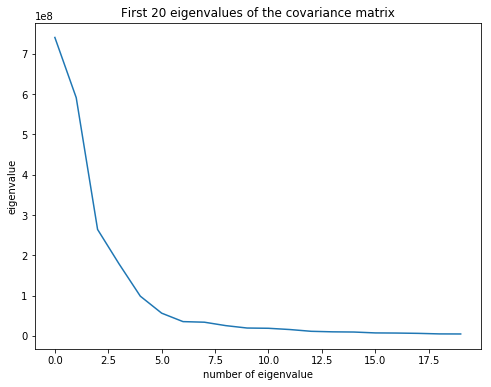

In [78]:
fig=plt.figure(figsize=(8,6))
plt.plot(eigenvalues[0:20])
plt.xlabel('number of eigenvalue')
plt.ylabel('eigenvalue')
plt.title("First 20 eigenvalues of the covariance matrix")
plt.show()

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [5]:
# Trials with ML algorithms

#TODO
#Polynomial regression

#Mattes algoritmer
#Try 1, LinearRegression
classifier_1 = linear_model.LinearRegression().fit(train_data, train_labels)
score1 = classifier_1.score(train_data, train_labels)
classifier_1.predict(test_data)

#Try 2, SVM
#classifier_2 = SVC(gamma='auto')
#classifier_2.fit(train_data, train_labels.values.ravel())
#classifier_2.score(train_data, train_labels.values.ravel())

#Try 3, Deep learning
classifier_3 = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(5, 2), random_state=1)
classifier_3.fit(train_data, train_labels.values.ravel())
score3 = classifier_3.score(train_data, train_labels.values.ravel())

#Try 4, Bayesian Ridge regression
classifier_4 = linear_model.BayesianRidge().fit(train_data, train_labels.values.ravel())
score4 = classifier_4.score(train_data, train_labels.values.ravel())

#Try 5, Random Forest
classifier_5 = RandomForestClassifier(n_estimators=100, max_depth = 8).fit(train_data, train_labels.values.ravel())
score5 = classifier_5.score(train_data, train_labels.values.ravel())
classifier_5_output = classifier_5.predict(test_data)


#Output
print("Linear regression score: ", score1)
print("Deep learning score: ", score3)
print("Bayesian Ridge Regression score: ", score4)
print("Random Forest score: ", score5)

Linear regression score:  0.3364829686294144
Deep learning score:  0.49919779967911987
Bayesian Ridge Regression score:  0.24888942840916128
Random Forest score:  0.7107494842997937


In [1]:
#Mattis algoritmer
#Try the same as above, but for the reduced data

classifier_5_reduced = RandomForestClassifier(n_estimators=10, max_depth = 10).fit(traindata_PCA, train_labels.values.ravel())
score5_reduced = classifier_5_reduced.score(traindata_PCA, train_labels.values.ravel())
classifier_5_reduced_output = classifier_5_reduced.predict(testdata_PCA)


#Output
print("Random Forest score with PCA compression, boom: ", score5_reduced)



NameError: name 'RandomForestClassifier' is not defined

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [106]:
#Confusion matrix ...

#Output for Accuracy competition
output_csv = pd.DataFrame({'Sample_label': classifier_5_reduced_output})
output_csv.index += 1
output_csv.index.names = ['Sample_id']

#output_csv.rename({1: "Sample_id", 2: "Sample_label"}, index=)
print(output_csv)
output_csv.to_csv('upload_to_kaggle_accuracy.csv')


NameError: name 'classifier_5_output' is not defined

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *